<a href="https://colab.research.google.com/github/polyakova-pn/2016-solar_project/blob/master/lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 2

Предобработка данных.
Анализ пропусков, дубликатов, корректности типов данных. Выявление и обработка выбросов в данных (метод IQR, z-score).

### Основные этапы предобработки данных

Предобработка данных является важным шагом при построении модели машинного обучения. Качественная предобработка данных может значительно повысить качество построенной модели.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Grossmend/CSV/master/titanic/data.csv')

Посмотрим первые 10 строк загруженных данных:

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Выведим последнии 5 строк датафрейма:

In [ ]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Посмотрим статистические характеритики для числовых признаков:

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Проверим наличие полных дубликатов (т. е. дубликатами будут считаться полностью совпадаюшие строки):

In [ ]:
df.duplicated().sum()

0

Если нужно проверить дубликаты по определённым столбцам, то для этого есть параметр subset, в котором указываются столбцы по которым нужно смотртеь дубликаты.

In [ ]:
df.duplicated(subset = ['PassengerId']).sum()

0

In [ ]:
df.duplicated(subset = ['Age']).sum()

802

Просмотр уникальных значений столбца:

In [ ]:
for i in df.columns:
    print(f'Столбец {i}: ')
    print(df[i].unique())

Столбец PassengerId: 
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 

### Анализ и заполнение пропусков в данных

Проверить наличие пропусков и вывести число пропусков по столбцу можно через:

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.isnull().sum() / len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
df['Age'] = df['Age'].fillna(0)

In [ ]:
df['Age'].fillna(0, inplace = True)

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Можно заменять пропуски по группам:

In [ ]:
for i in df['Pclass'].value_counts():
    df[df['Pclass'] == i]['Age'].fillna(df[df['Pclass'] == i]['Age'].median(), inplace = True)

<ipython-input-109-de9f96a7fa86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Pclass'] == i]['Age'].fillna(df[df['Pclass'] == i]['Age'].median(), inplace = True)


### Анализ выбросов в данных

"Ящик с усами" (диаграмма размаха, усиковая диаграмма, англ. box-and-whiskers diagram, box-and-whiskers plot, box plot) — график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей.

Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы.

![image.png](attachment:image.png)

Подробнее про boxplot можно посмотреть: https://builtin.com/data-science/boxplot

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

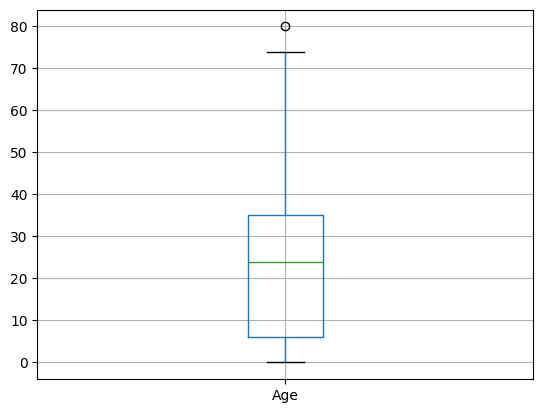

In [ ]:
df[['Age']].boxplot()

### Метод IQR

In [ ]:
IQR = df['Age'].quantile(q=0.75) - df['Age'].quantile(q=0.25)
lower_bound = df['Age'].quantile(q=0.25) - 1.5 * IQR
upper_bound = df['Age'].quantile(q=0.75) + 1.5 * IQR
df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


Можно использовать перцентили для определения границ выбросов:

In [ ]:
lower_bound = df['Age'].quantile(q=0.025)
upper_bound = df['Age'].quantile(q=0.975)
df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


### Фильтр Хэмпеля

Заменяет на nan все значения, у которых разница с медианой больше, чем три медианных абсолютных отклонения.

In [ ]:
def hampel(vals_orig):
    vals = vals_orig.copy()
    difference = np.abs(vals.median()-vals)
    median_abs_deviation = difference.median()
    threshold = 3 * median_abs_deviation
    outlier_idx = difference > threshold
    vals[outlier_idx] = np.nan
    return(vals)

In [ ]:
hampel(df['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### Z-score

Z-score — это статистическая мера, которая показывает, насколько значение отклоняется от среднего значения выборки в единицах стандартного отклонения. Выбросы можно определить, присвоив порог Z-оценки, например, 2 или 3. Значения с Z-оценкой, превышающей этот порог, считаются выбросами.

Для расчета z-показателя есть следующая формула:

z = (X - μ) / σ

X — это одно необработанное значение данных.
μ - среднее значение населения
σ - стандартное отклонение населения

In [ ]:
data = df[['Age', 'Fare']].copy()
z = np.abs(stats.zscore(data))

In [ ]:
data_clean = data[(z<3).all(axis=1)]

In [ ]:
data_clean.shape

(870, 2)

## Практические задания

### Проведите анализ данных из датасета House _prices.csv

In [ ]:
df = pd.read_csv('House _prices.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


1. Проверьте корректность типов данных в датасете и при необходимости оптимизируйте тип данных.

In [ ]:
df.dtypes
wrong = df.dtypes[(df.dtypes == float)]
print(wrong.index[:])
df[wrong.index[:]] = df[wrong.index[:]].fillna(535)
df[wrong.index[:]] = df[wrong.index[:]].astype(int)
df.dtypes

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage       int64
LotArea           int64
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 81, dtype: object

2. Проверьте наличие дубликатов в данных.

In [ ]:
df.duplicated().sum() > 0

False

3. Вычислите процент пропусков по столбцам и обработайте пропуски в данных (аргументируя выбранный подход).

In [ ]:
for c in df.columns:
  print(c, df[c].isnull().sum() / len(df), '%')

  if df[c].isnull().sum() / len(df) > 50:
    df = df[~df[c]]
  else:
    df[c] = df[c].fillna(df[c].value_counts().index[0] )


for c in df.columns:

  print(c, df[c].isnull().sum() / len(df), '%')

Id 0.0 %
MSSubClass 0.0 %
MSZoning 0.0 %
LotFrontage 0.0 %
LotArea 0.0 %
Street 0.0 %
Alley 0.9376712328767123 %
LotShape 0.0 %
LandContour 0.0 %
Utilities 0.0 %
LotConfig 0.0 %
LandSlope 0.0 %
Neighborhood 0.0 %
Condition1 0.0 %
Condition2 0.0 %
BldgType 0.0 %
HouseStyle 0.0 %
OverallQual 0.0 %
OverallCond 0.0 %
YearBuilt 0.0 %
YearRemodAdd 0.0 %
RoofStyle 0.0 %
RoofMatl 0.0 %
Exterior1st 0.0 %
Exterior2nd 0.0 %
MasVnrType 0.005479452054794521 %
MasVnrArea 0.0 %
ExterQual 0.0 %
ExterCond 0.0 %
Foundation 0.0 %
BsmtQual 0.025342465753424658 %
BsmtCond 0.025342465753424658 %
BsmtExposure 0.026027397260273973 %
BsmtFinType1 0.025342465753424658 %
BsmtFinSF1 0.0 %
BsmtFinType2 0.026027397260273973 %
BsmtFinSF2 0.0 %
BsmtUnfSF 0.0 %
TotalBsmtSF 0.0 %
Heating 0.0 %
HeatingQC 0.0 %
CentralAir 0.0 %
Electrical 0.0006849315068493151 %
1stFlrSF 0.0 %
2ndFlrSF 0.0 %
LowQualFinSF 0.0 %
GrLivArea 0.0 %
BsmtFullBath 0.0 %
BsmtHalfBath 0.0 %
FullBath 0.0 %
HalfBath 0.0 %
BedroomAbvGr 0.0 %
KitchenAb

4. Проанализируйте выбросы в данных используя метод IQR и z-score. Удалите имеющиеся выбросы или замените их на медианное значение.

In [ ]:
for c in df.columns:

  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
  upper_bound = df[[c]].quantile(q=0.75) + 1.5 * IQR
  wr = df[(df[[c]] < lower_bound) | (df[[c]] > upper_bound)]
  print(c)
  print('IQR', len(wr) / len(df[[c]]), '%')
  #data = pd.read_csv('House _prices.csv')[[c]].copy()
  if df.dtypes[c] != object:

    data = df[[c]].copy()

    z = np.abs(stats.zscore(data))
    data_clean = data[(z<3)]
    print('z-score', len(data_clean) / len(df[[c]]), '%')
  df = df[~df.isin(wr)]

Id
IQR 1.0 %
z-score 1.0 %
MSSubClass
IQR 1.0 %
z-score 1.0 %
MSZoning
IQR 1.0 %
LotFrontage
IQR 1.0 %
z-score 1.0 %


<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-128-b36ed9422204>:5: FutureWarning: The d

LotArea
IQR 1.0 %
z-score 1.0 %
Street
IQR 1.0 %
Alley
IQR 1.0 %
LotShape
IQR 1.0 %


<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-128-b36ed9422204>:5: FutureWarning: The d

LandContour
IQR 1.0 %
Utilities
IQR 1.0 %
LotConfig
IQR 1.0 %


<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-128-b36ed9422204>:5: FutureWarning: The d

LandSlope
IQR 1.0 %
Neighborhood
IQR 1.0 %
Condition1
IQR 1.0 %


<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-128-b36ed9422204>:5: FutureWarning: The d

Condition2
IQR 1.0 %
BldgType
IQR 1.0 %
HouseStyle
IQR 1.0 %


<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-128-b36ed9422204>:5: FutureWarning: The d

OverallQual
IQR 1.0 %
z-score 1.0 %
OverallCond
IQR 1.0 %
z-score 1.0 %
YearBuilt
IQR 1.0 %
z-score 1.0 %
YearRemodAdd
IQR 1.0 %
z-score 1.0 %
RoofStyle
IQR 1.0 %
RoofMatl
IQR 1.0 %


<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-128-b36ed9422204>:5: FutureWarning: The d

Exterior1st
IQR 1.0 %
Exterior2nd
IQR 1.0 %
MasVnrType
IQR 1.0 %


<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-128-b36ed9422204>:5: FutureWarning: The d

MasVnrArea
IQR 1.0 %
z-score 1.0 %
ExterQual
IQR 1.0 %
ExterCond
IQR 1.0 %


<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-128-b36ed9422204>:5: FutureWarning: The d

Foundation
IQR 1.0 %
BsmtQual
IQR 1.0 %
BsmtCond
IQR 1.0 %


<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-128-b36ed9422204>:5: FutureWarning: The d

BsmtExposure
IQR 1.0 %
BsmtFinType1
IQR 1.0 %
BsmtFinSF1
IQR 1.0 %
z-score 1.0 %


<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-128-b36ed9422204>:5: FutureWarning: The d

BsmtFinType2
IQR 1.0 %
BsmtFinSF2
IQR 1.0 %
z-score 1.0 %
BsmtUnfSF
IQR 1.0 %
z-score 1.0 %
TotalBsmtSF
IQR 1.0 %
z-score 1.0 %
Heating
IQR 1.0 %
HeatingQC
IQR 1.0 %
CentralAir
IQR 1.0 %


<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-128-b36ed9422204>:5: FutureWarning: The d

Electrical
IQR 1.0 %
1stFlrSF
IQR 1.0 %
z-score 1.0 %
2ndFlrSF
IQR 1.0 %
z-score 1.0 %
LowQualFinSF
IQR 1.0 %
z-score 1.0 %
GrLivArea
IQR 1.0 %
z-score 1.0 %
BsmtFullBath
IQR 1.0 %
z-score 1.0 %
BsmtHalfBath
IQR 1.0 %
z-score 1.0 %
FullBath
IQR 1.0 %
z-score 1.0 %
HalfBath
IQR 1.0 %
z-score 1.0 %
BedroomAbvGr
IQR 1.0 %
z-score 1.0 %
KitchenAbvGr
IQR 1.0 %
z-score 1.0 %
KitchenQual
IQR 1.0 %


<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-128-b36ed9422204>:5: FutureWarning: The d

TotRmsAbvGrd
IQR 1.0 %
z-score 1.0 %
Functional
IQR 1.0 %
Fireplaces
IQR 1.0 %
z-score 1.0 %
FireplaceQu
IQR 1.0 %


<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-128-b36ed9422204>:5: FutureWarning: The d

GarageType
IQR 1.0 %
GarageYrBlt
IQR 1.0 %
z-score 1.0 %
GarageFinish
IQR 1.0 %
GarageCars
IQR 1.0 %
z-score 1.0 %
GarageArea
IQR 1.0 %
z-score 1.0 %
GarageQual
IQR 1.0 %
GarageCond
IQR 1.0 %
PavedDrive
IQR 1.0 %


<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-128-b36ed9422204>:5: FutureWarning: The d

WoodDeckSF
IQR 1.0 %
z-score 1.0 %
OpenPorchSF
IQR 1.0 %
z-score 1.0 %
EnclosedPorch
IQR 1.0 %
z-score 1.0 %
3SsnPorch
IQR 1.0 %
z-score 1.0 %
ScreenPorch
IQR 1.0 %
z-score 1.0 %
PoolArea
IQR 1.0 %
z-score 1.0 %
PoolQC
IQR 1.0 %
Fence
IQR 1.0 %


<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-128-b36ed9422204>:5: FutureWarning: The d

MiscFeature
IQR 1.0 %
MiscVal
IQR 1.0 %
z-score 1.0 %
MoSold
IQR 1.0 %
z-score 1.0 %
YrSold
IQR 1.0 %
z-score 1.0 %
SaleType
IQR 1.0 %
SaleCondition
IQR 1.0 %
SalePrice
IQR 1.0 %
z-score 1.0 %


<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-128-b36ed9422204>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-128-b36ed9422204>:5: FutureWarning: The d

In [ ]:
for c in df.columns:

  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
  upper_bound = df[[c]].quantile(q=0.75) + 1.5 * IQR
  wr = df[(df[[c]] < lower_bound) | (df[[c]] > upper_bound)]
  print(c)
  print('IQR', len(wr) / len(df[[c]]), '%')

Id
IQR 1.0 %
MSSubClass
IQR 1.0 %
MSZoning
IQR 1.0 %
LotFrontage
IQR 1.0 %
LotArea
IQR 1.0 %


<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-129-d5daff6d9d92>:5: FutureWarning: The d

Street
IQR 1.0 %
Alley
IQR 1.0 %
LotShape
IQR 1.0 %
LandContour
IQR 1.0 %
Utilities
IQR 1.0 %


<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-129-d5daff6d9d92>:5: FutureWarning: The d

LotConfig
IQR 1.0 %
LandSlope
IQR 1.0 %
Neighborhood
IQR 1.0 %
Condition1
IQR 1.0 %
Condition2
IQR 1.0 %
BldgType
IQR 1.0 %


<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-129-d5daff6d9d92>:5: FutureWarning: The d

HouseStyle
IQR 1.0 %
OverallQual
IQR 1.0 %
OverallCond
IQR 1.0 %
YearBuilt
IQR 1.0 %
YearRemodAdd
IQR 1.0 %
RoofStyle
IQR

<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-129-d5daff6d9d92>:5: FutureWarning: The d

 1.0 %
RoofMatl
IQR 1.0 %
Exterior1st
IQR 1.0 %
Exterior2nd
IQR 1.0 %
MasVnrType
IQR 1.0 %
MasVnrArea
IQR 1.0 %
ExterQual
IQR 1.0 %
ExterCond
IQR 1.0 %
Foundation
IQR 1.0 %
BsmtQual
IQR 1.0 %


<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-129-d5daff6d9d92>:5: FutureWarning: The d

BsmtCond
IQR 1.0 %
BsmtExposure
IQR 1.0 %
BsmtFinType1
IQR 1.0 %
BsmtFinSF1
IQR 1.0 %
BsmtFinType2
IQR 1.0 %
BsmtFinSF2
IQR 1.0 %


<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-129-d5daff6d9d92>:5: FutureWarning: The d

BsmtUnfSF
IQR 1.0 %
TotalBsmtSF
IQR 1.0 %
Heating
IQR 1.0 %
HeatingQC
IQR 1.0 %
CentralAir
IQR 1.0 %
Electrical
IQR 1.0 %


<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-129-d5daff6d9d92>:5: FutureWarning: The d

1stFlrSF
IQR 1.0 %
2ndFlrSF
IQR 1.0 %
LowQualFinSF
IQR 1.0 %
GrLivArea
IQR 1.0 %
BsmtFullBath
IQR 1.0 %
BsmtHalfBath
IQR 1.0 %
FullBath
IQR 1.0 %
HalfBath
IQR 1.0 %
BedroomAbvGr
IQR 1.0 %
KitchenAbvGr
IQR 1.0 %
KitchenQual
IQR 1.0 %
TotRmsAbvGrd
IQR 1.0 %


<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-129-d5daff6d9d92>:5: FutureWarning: The d

Functional
IQR 1.0 %
Fireplaces
IQR 1.0 %
FireplaceQu
IQR 1.0 %
GarageType
IQR 1.0 %


<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-129-d5daff6d9d92>:5: FutureWarning: The d

GarageYrBlt
IQR 1.0 %
GarageFinish
IQR 1.0 %
GarageCars
IQR 1.0 %
GarageArea
IQR 1.0 %


<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-129-d5daff6d9d92>:5: FutureWarning: The d

GarageQual
IQR 1.0 %
GarageCond
IQR 1.0 %
PavedDrive
IQR 1.0 %
WoodDeckSF
IQR 1.0 %
OpenPorchSF
IQR 1.0 %
EnclosedPorch
IQR 1.0 %
3SsnPorch
IQR 1.0 %
ScreenPorch
IQR 1.0 %
PoolArea
IQR 1.0 %
PoolQC
IQR 1.0 %
Fence
IQR 1.0 %
MiscFeature
IQR 1.0 %


<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-129-d5daff6d9d92>:5: FutureWarning: The d

MiscVal
IQR 1.0 %
MoSold
IQR 1.0 %
YrSold
IQR 1.0 %
SaleType
IQR 1.0 %
SaleCondition
IQR 1.0 %
SalePrice
IQR 1.0 %


<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = df[[c]].quantile(q=0.75) - df[[c]].quantile(q=0.25)
<ipython-input-129-d5daff6d9d92>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower_bound = df[[c]].quantile(q=0.25) - 1.5 * IQR
<ipython-input-129-d5daff6d9d92>:5: FutureWarning: The d